<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Demo de Yolo (you only looks once)

Detección de objetos en imagenes<br>

Esta demo está basada en el siguiente repositorio<br>
[Dataset source](https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3)
<br>
v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Descargar la carpeta demo
if os.access('model_data', os.F_OK) is False:
    if os.access('yolo_demo.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://github.com/InoveAlumnos/transfer_learning_python/raw/main/anexo/yolo_demo.zip > yolo_demo.zip
        else:
            !wget yolo_demo.zip https://github.com/InoveAlumnos/transfer_learning_python/raw/main/anexo/yolo_demo.zip
    !unzip -q yolo_demo.zip
else:
    print("El archivo ya se encuentra descargado")

--2020-12-07 20:19:49--  http://yolo_demo.zip/
Resolving yolo_demo.zip (yolo_demo.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘yolo_demo.zip’
--2020-12-07 20:19:49--  https://github.com/InoveAlumnos/transfer_learning_python/raw/main/anexo/yolo_demo.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/anexo/yolo_demo.zip [following]
--2020-12-07 20:19:49--  https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/anexo/yolo_demo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34321 (34K) [application/

In [4]:
# Descargar los pesos
import gdown
if os.access('./model_data/yolov3.weights', os.F_OK) is False:
    url = 'https://drive.google.com/uc?id=1RXphvkmwGcqJ7AsVhb1IeOQxDIv3wFbj'
    output = './model_data/yolov3.weights'
    gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RXphvkmwGcqJ7AsVhb1IeOQxDIv3wFbj
To: /content/model_data/yolov3.weights
248MB [00:06, 35.5MB/s]


In [7]:
# Descargar la imagen de prueba
if os.access('street.jpg', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/imagenes/street.jpg > street.jpg
    else:
        !wget street.jpg https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/imagenes/street.jpg

--2020-12-07 20:23:20--  http://street.zip/
Resolving street.zip (street.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘street.zip’
--2020-12-07 20:23:20--  https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/imagenes/street.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 465046 (454K) [image/jpeg]
Saving to: ‘street.jpg’

street.jpg          100%[===================>] 454.15K  --.-KB/s    in 0.009s  

2020-12-07 20:23:20 (46.8 MB/s) - ‘street.jpg’ saved [465046/465046]

FINISHED --2020-12-07 20:23:20--
Total wall clock time: 0.07s
Downloaded: 1 files, 454K in 0.009s (46.8 MB/s)


In [8]:
# Descargar el video de prueba
if os.access('video.mp4', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://github.com/InoveAlumnos/transfer_learning_python/raw/main/imagenes/video.mp4 > video.mp4
    else:
        !wget video.mp4 https://github.com/InoveAlumnos/transfer_learning_python/raw/main/imagenes/video.mp4

--2020-12-07 20:24:19--  http://video.mp4/
Resolving video.mp4 (video.mp4)... failed: Name or service not known.
wget: unable to resolve host address ‘video.mp4’
--2020-12-07 20:24:19--  https://github.com/InoveAlumnos/transfer_learning_python/raw/main/imagenes/video.mp4
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/imagenes/video.mp4 [following]
--2020-12-07 20:24:20--  https://raw.githubusercontent.com/InoveAlumnos/transfer_learning_python/main/imagenes/video.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2916403 (2.8M) [application/octet-stream]
Sa

In [9]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import tensorflow as tf
import time
from google.colab.patches import cv2_imshow

In [10]:
from yolov3.utils import detect_image, detect_realtime, detect_video, Load_Yolo_model, detect_video_realtime_mp
from yolov3.configs import *
def detectar_imagen(image_path):
    out_path = "yolo_" + os.path.basename(image_path)
    print("input source:", image_path)
    print("output source:", out_path)

    yolo = Load_Yolo_model()
    new_image = detect_image(yolo, image_path, out_path, input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
    cv2_imshow(new_image)

input source: street.jpg
output source: yolo_street.jpg
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


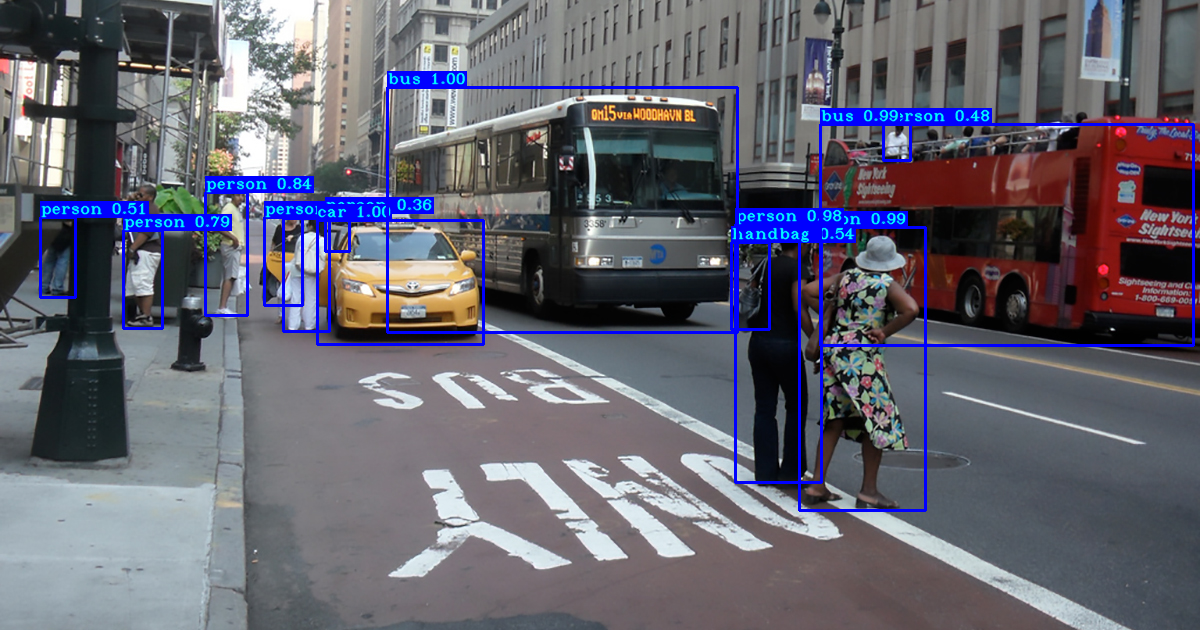

In [11]:
detectar_imagen("street.jpg")

In [12]:
from yolov3.utils import detect_image, detect_realtime, detect_video, Load_Yolo_model, detect_video_realtime_mp
from yolov3.configs import *
def detectar_video(video_path):
    out_path = "yolo_" + os.path.basename(video_path)
    print("input source:", video_path)
    print("output source:", out_path)

    yolo = Load_Yolo_model()
    detect_video(yolo, video_path, out_path, input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))

In [13]:
detectar_video("video.mp4")

input source: video.mp4
output source: yolo_video.mp4
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Time: 1261.34ms, Detection FPS: 0.8, total FPS: 0.8
Time: 675.50ms, Detection FPS: 1.5, total FPS: 1.4
Time: 477.74ms, Detection FPS: 2.1, total FPS: 2.0
Time: 377.89ms, Detection FPS: 2.6, total FPS: 2.5
Time: 318.40ms, Detection FPS: 3.1, total FPS: 3.0
Time: 278.64ms, Detection FPS: 3.6, total FPS: 3.4
Time: 249.48ms, Detection FPS: 4.0, total FPS: 3.8
Time: 227.72ms, Detection FPS: 4.4, total FPS: 4.1
Time: 210.70ms, Detection FPS: 4.7, total FPS: 4.5
Time: 197.09ms, Detection FPS: 5.1, total FPS: 4.7
Time: 185.86ms, Detection FPS: 5.4, total FPS: 5.0
Time: 176.65ms, Detection FPS: 5.7, total FPS: 5.3
Time: 169.32ms, Detection FPS: 5.9, total FPS: 5.5
Time: 162.45ms, Detection FPS: 6.2, total FPS: 5.7
Time: 156.84ms, Detection FPS: 6.4, total FPS: 5.9
Time: 151.66ms, Detection FPS: 6.6, total FPS: 6.1
Time: 147.05ms, Detection FPS: 6.8, total FPS: 6.2
Time: 